# Testing reading and handling NIfTI files
http://nipy.org/nibabel/gettingstarted.html

In [1]:
# external imports
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import time

# local imports
import sys
sys.path.append('..')
from util.nifti import *

**type(img)**: nibabel.nifti1.Nifti1Image<br>
**shape**: (length(x), length(y), total number of slices)<br>
**[data type](https://docs.scipy.org/doc/numpy/user/basics.types.html)** is uint16, unsigned integer (0 to 65535)

# Load dataset into dataframe

## Load file names and labels

In [2]:
df = pd.read_csv('../csvs/GT_Training.csv', header=None, names=['file','label'])
df.file = df.file.map(lambda x: x.replace("'",''))
print_shape(df)

shape=(1472, 2)


## Load image data

In [3]:
start = time.time()
df['img'] = df.file.map(lambda x: nib.load('../data/' + str(x) + '.nii.gz'))
print('nifti files loaded in {0:.3}s'.format(time.time() - start))

nifti files loaded in 1.26s


In [4]:
print_shape(df)
df.head(3)

shape=(1472, 3)


,file,label,img
0,I004_1,0.0,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
1,I004_2,0.0,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
2,I004_3,1.0,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...


nrows: 5, ncols: 10, nslices: 50


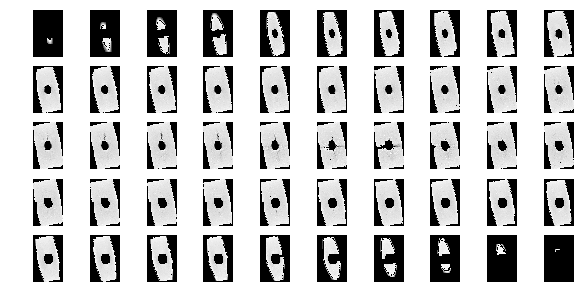

In [5]:
plot_dim(img=df['img'][0], dim=2)